356
['C:\\Windows\\Fonts\\LTYPEB.TTF', 'C:\\Windows\\Fonts\\BRITANIC.TTF', 'C:\\Windows\\Fonts\\himalaya.ttf', 'C:\\Windows\\Fonts\\georgiai.ttf', 'C:\\Windows\\Fonts\\seguiemj.ttf', 'C:\\Windows\\Fonts\\GARAIT.TTF', 'C:\\Windows\\Fonts\\malgunbd.ttf', 'C:\\Windows\\Fonts\\cour.ttf', 'C:\\Windows\\Fonts\\simsunb.ttf', 'C:\\Windows\\Fonts\\BRADHITC.TTF']


In [75]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform # 운영체제 확인을 위한 모듈
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
print(len(font_list))
print(font_list[:10]) 

356
['C:\\Windows\\Fonts\\LTYPEB.TTF', 'C:\\Windows\\Fonts\\BRITANIC.TTF', 'C:\\Windows\\Fonts\\himalaya.ttf', 'C:\\Windows\\Fonts\\georgiai.ttf', 'C:\\Windows\\Fonts\\seguiemj.ttf', 'C:\\Windows\\Fonts\\GARAIT.TTF', 'C:\\Windows\\Fonts\\malgunbd.ttf', 'C:\\Windows\\Fonts\\cour.ttf', 'C:\\Windows\\Fonts\\simsunb.ttf', 'C:\\Windows\\Fonts\\BRADHITC.TTF']


In [83]:
font_path = r'C:\Windows\Fonts\NGULIM.TTF' # HY견명조 폰트 경로

# 2. FontProperties 객체 생성
font_prop = fm.FontProperties(fname=font_path)

# 3. 마이너스 부호 설정 (필요한 경우)
plt.rc('axes', unicode_minus=False)

In [35]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
total_data = pd.read_csv('data\Total_data_Fix.csv')
numeric_data = pd.read_csv('data\Total_data_v2.csv')

In [94]:
target = total_data['Target']

In [96]:
numeric_data = pd.concat([numeric_data,target],axis=1)

In [97]:
#Numeric_Data에서 EDA진행 
numeric_data

,date,관측소,저층_중앙 수온(℃),중층_중앙 수온(℃),표층_중앙 수온(℃),저층_최고 수온(℃),중층_최고 수온(℃),표층_최고 수온(℃),저층_최저 수온(℃),중층_최저 수온(℃),...,maxPs,maxPsHrmt,minPs,minPsHrmt,avgPs,ssDur,sumSsHr,avgTs,minTg,Target
0,2011-03-01,삼척(bsc87),8.60,8.6,8.5,9.1,9.00,8.8,8.40,8.4,...,1016.0,0.0,1011.6,1417.0,1013.4,11.4,0.2,0.5,-3.0,3
1,2011-03-02,삼척(bsc87),8.60,8.9,8.7,9.0,9.10,9.3,7.30,8.5,...,1020.7,2150.0,1014.4,319.0,1017.5,11.4,9.5,1.7,-4.8,3
2,2011-03-03,삼척(bsc87),7.90,8.3,8.4,8.3,8.80,9.1,7.60,7.9,...,1021.3,821.0,1018.6,1444.0,1020.2,11.4,10.6,2.5,-7.9,3
3,2011-03-04,삼척(bsc87),8.45,8.7,8.2,8.7,9.05,8.3,8.25,8.4,...,1023.1,938.0,1020.3,44.0,1022.1,11.5,10.8,2.9,-6.6,3
4,2011-03-05,삼척(bsc87),9.00,9.1,9.2,9.1,9.30,9.3,8.90,8.9,...,1022.2,0.0,1017.0,1751.0,1019.8,11.5,5.9,2.6,-4.4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,2025-01-28,삼척(bsc87),11.20,11.8,11.9,11.9,12.10,12.2,8.30,10.8,...,1014.2,2347.0,1005.5,1247.0,1010.1,10.2,8.8,-0.4,-3.7,2
5083,2025-01-29,삼척(bsc87),11.00,11.1,11.3,11.5,11.50,11.6,10.60,11.0,...,1022.8,2350.0,1013.8,32.0,1018.8,10.2,9.4,-1.3,-5.9,2
5084,2025-01-30,삼척(bsc87),11.50,11.7,11.8,12.0,12.10,12.1,10.80,11.1,...,1026.9,2205.0,1022.7,2.0,1024.6,10.3,9.3,-0.4,-6.5,2
5085,2025-01-31,삼척(bsc87),11.90,11.9,12.0,12.1,12.10,12.1,10.10,11.3,...,1027.7,934.0,1024.2,1631.0,1025.8,10.3,1.0,1.6,-4.7,2


In [98]:
numeric_data=numeric_data.set_index('date')

In [99]:
numeric_data=numeric_data.drop(columns='관측소')

In [44]:
total_data.isnull().sum()

Date             0
저층_중앙 수온(℃)      0
중층_중앙 수온(℃)      0
표층_중앙 수온(℃)      0
저층_최고 수온(℃)      0
                ..
cnn_feat_2044    0
cnn_feat_2045    0
cnn_feat_2046    0
cnn_feat_2047    0
Target           0
Length: 2091, dtype: int64

In [100]:
col_0 = numeric_data.columns[0:14]
col_1 = numeric_data.columns[14:30]
col_2 = numeric_data.columns[30:]


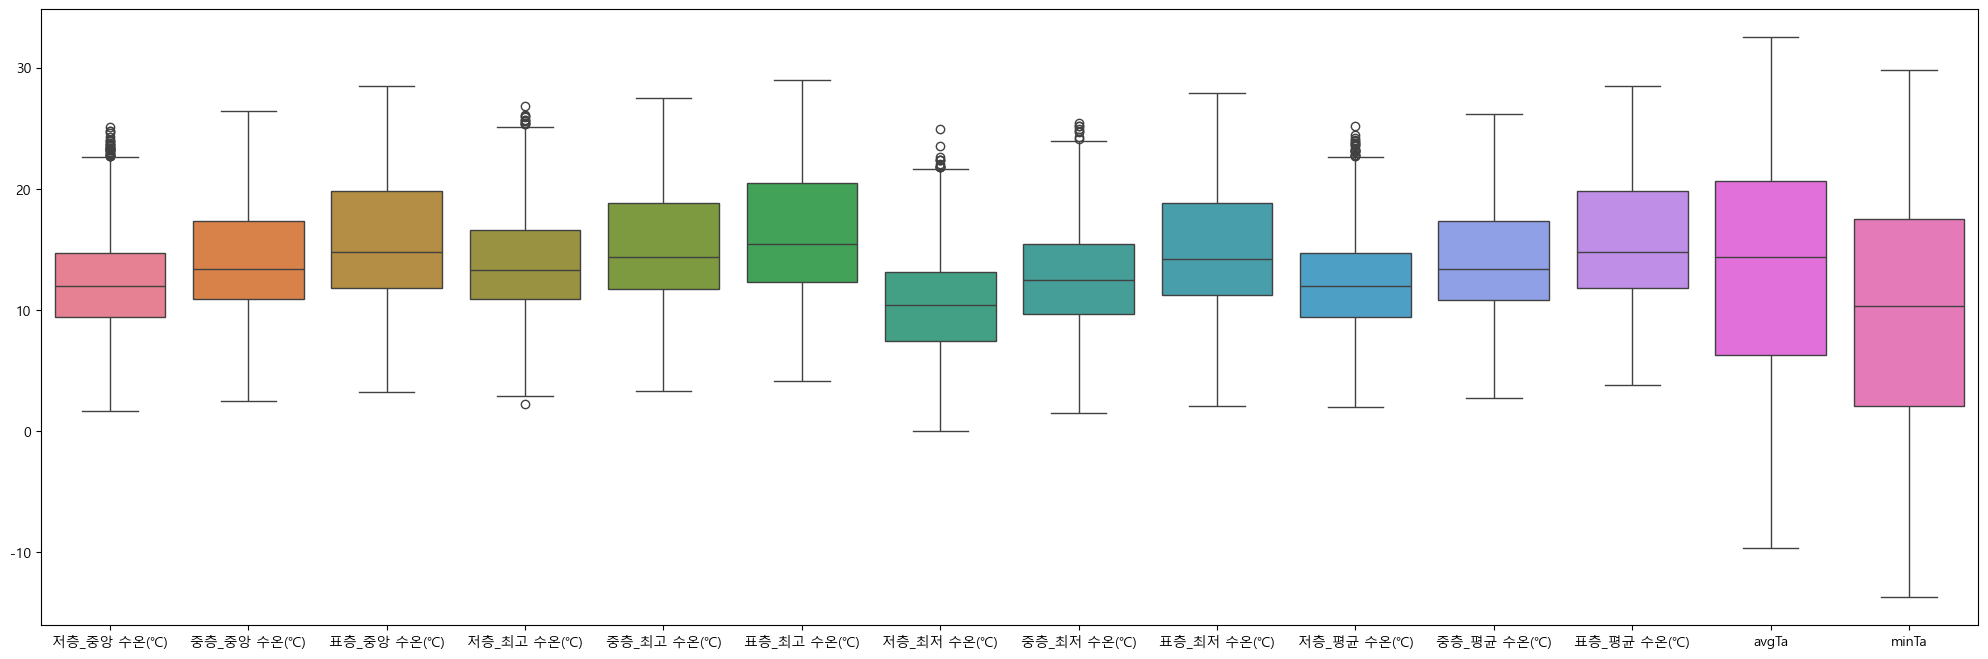

In [84]:
plt.figure(figsize=(25,8))
sns.boxplot(numeric_data[col_0])
plt.show()

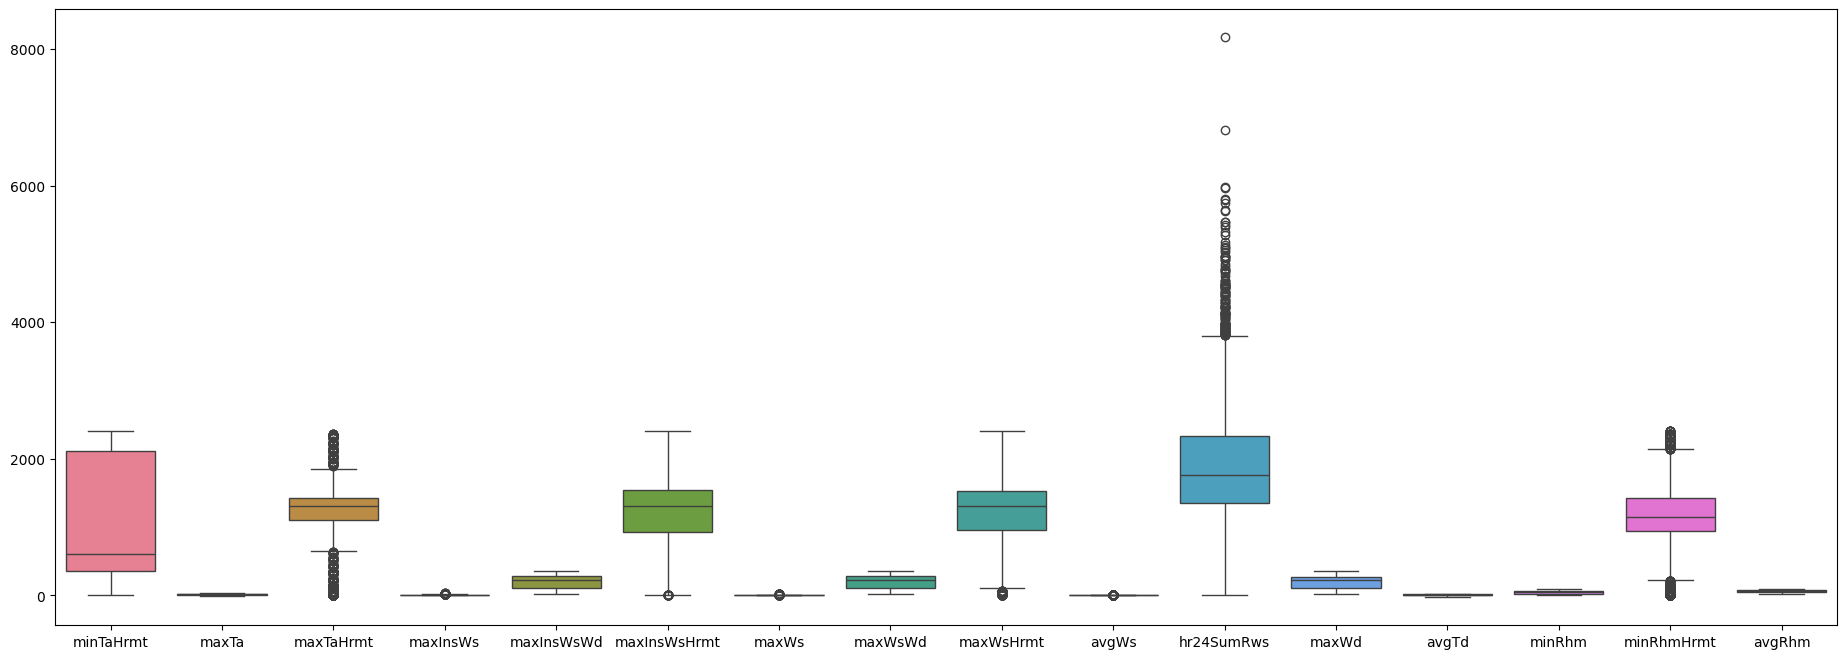

In [58]:
plt.figure(figsize=(23,8))
sns.boxplot(numeric_data[col_1])
plt.show()

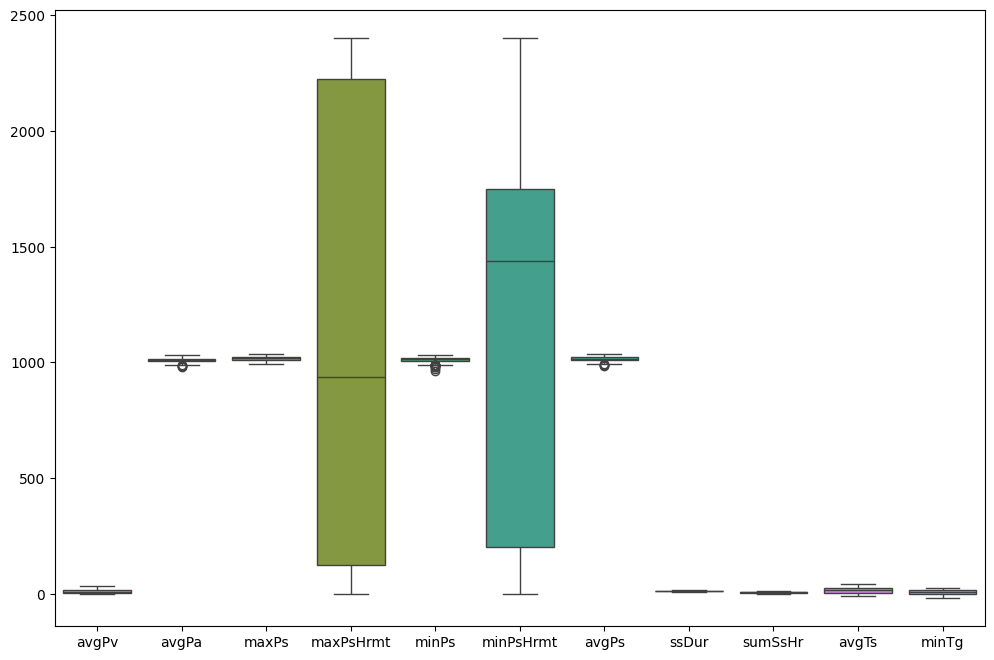

In [59]:
plt.figure(figsize=(12,8))
sns.boxplot(numeric_data[col_2])
plt.show()

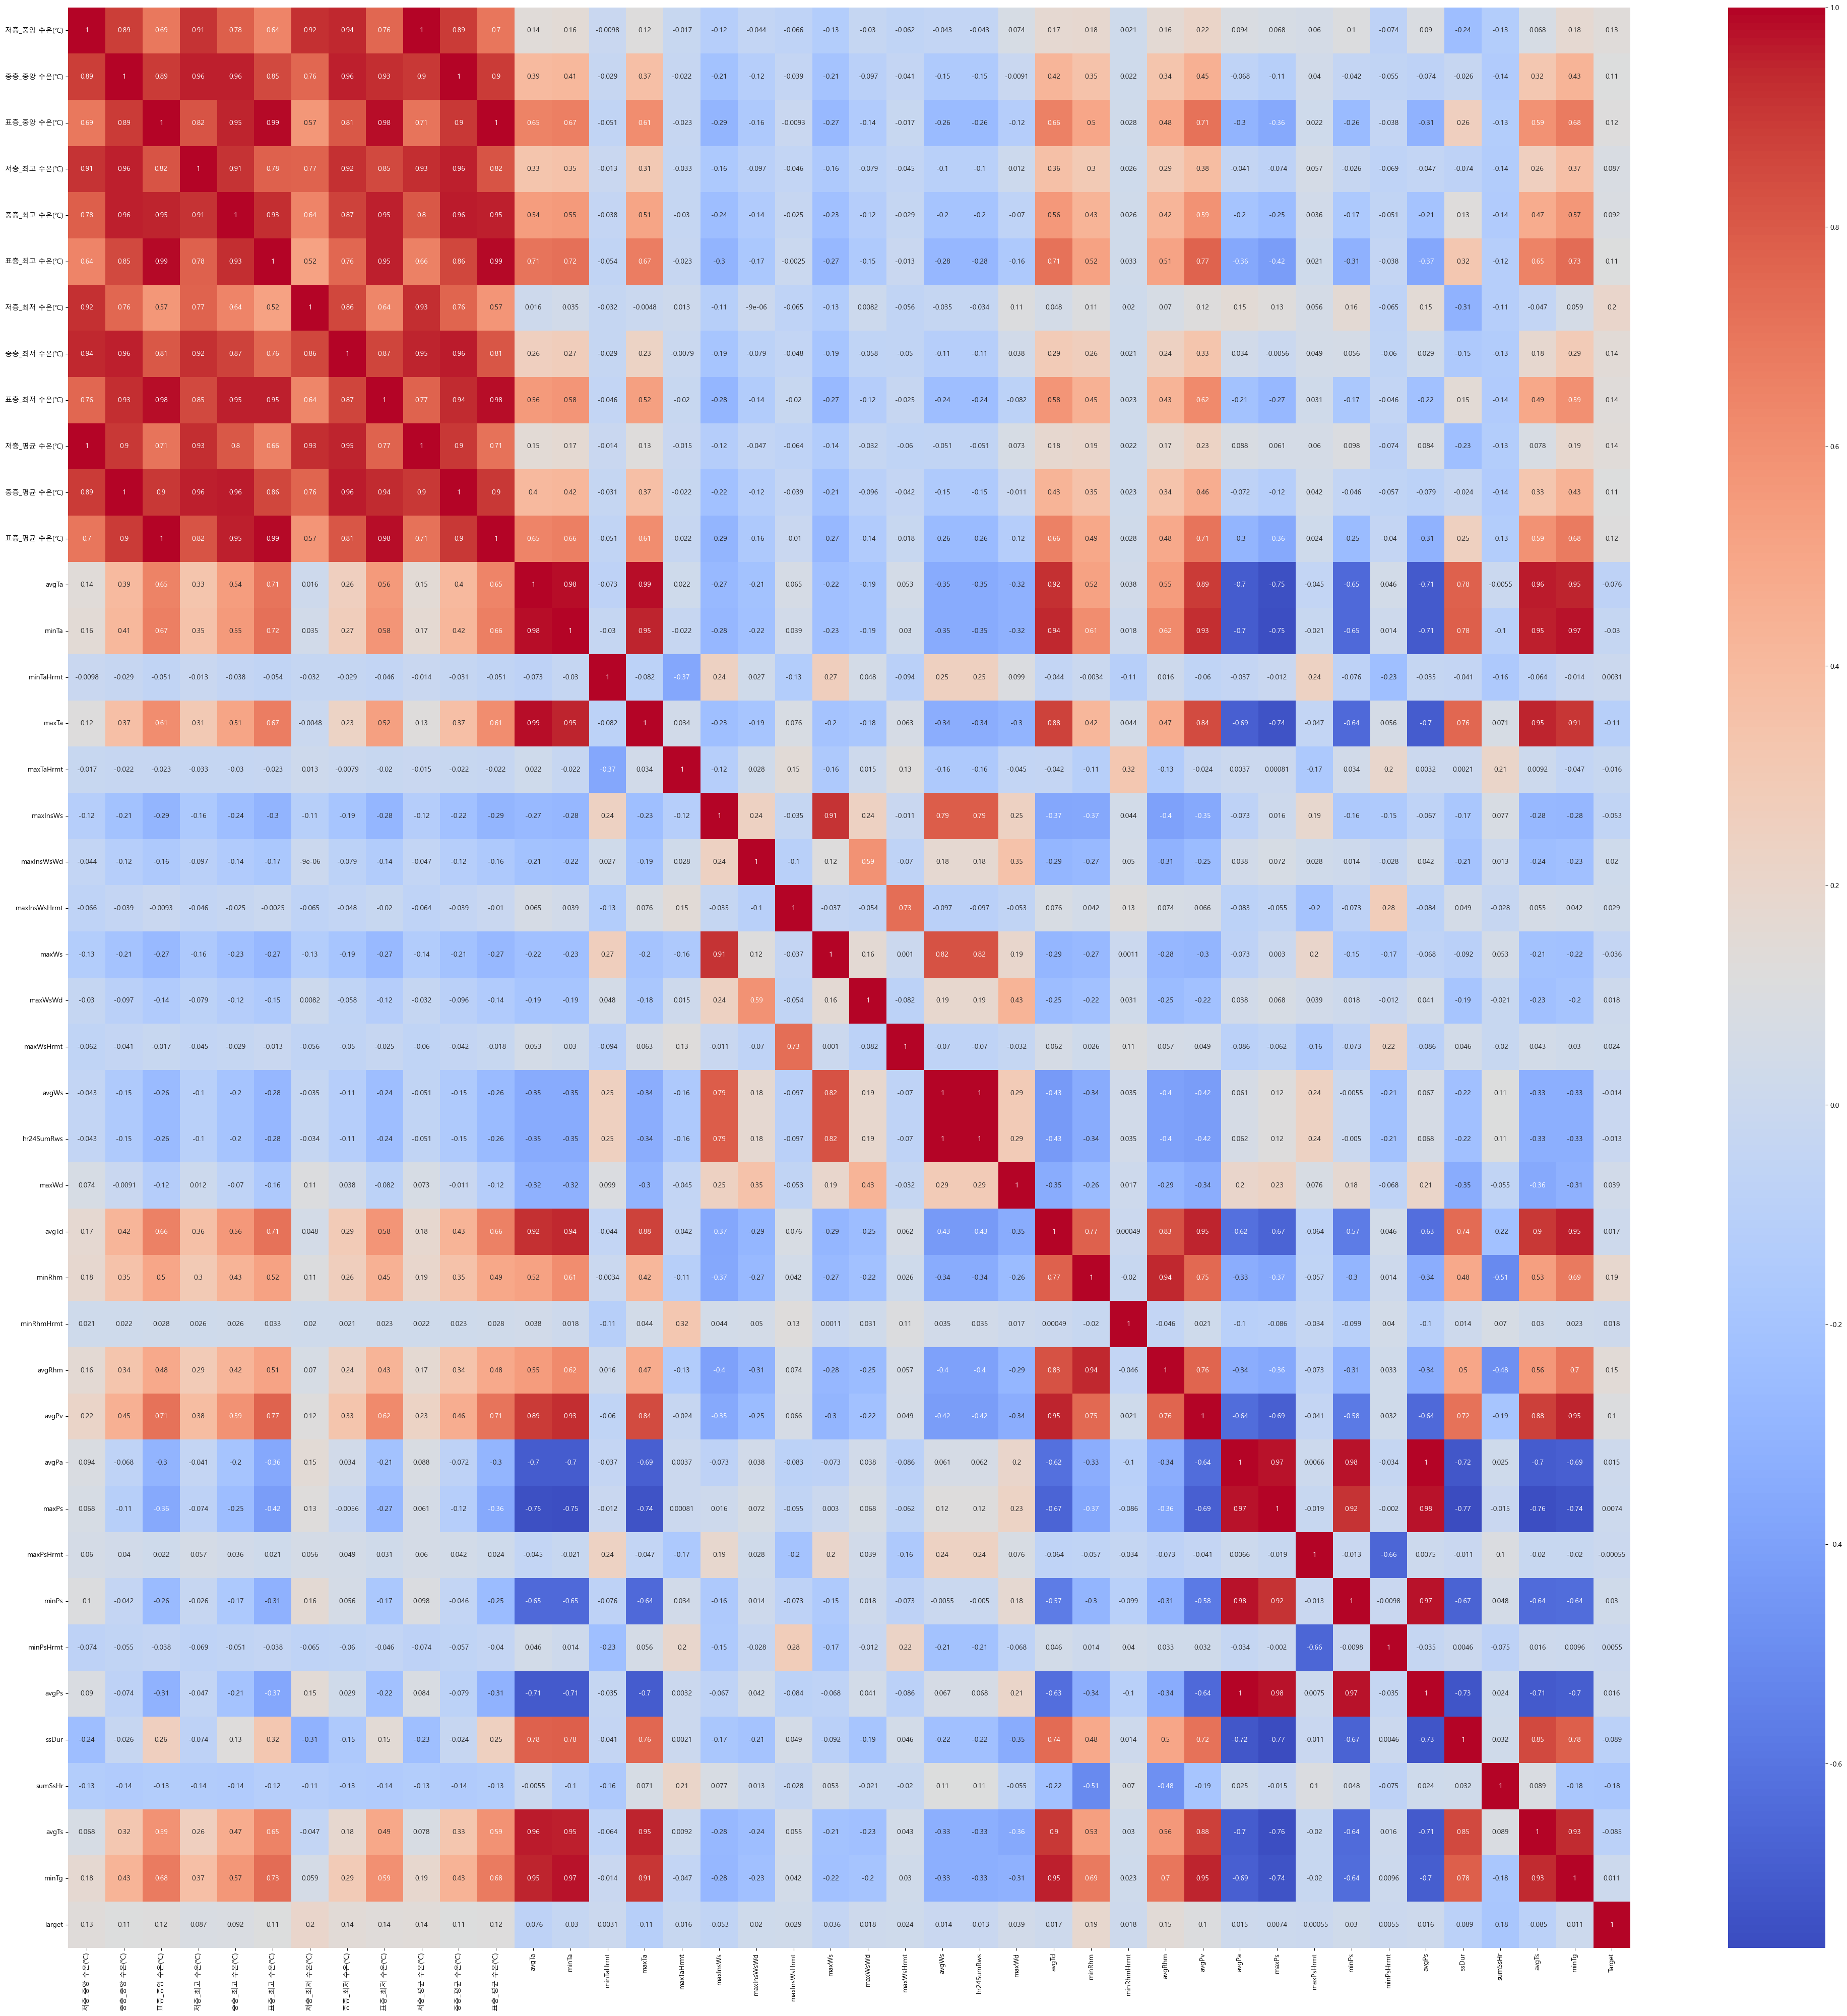

In [101]:
#heat_map시각화
plt.figure(figsize=(50,50))
correlation_matrix=numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [102]:
#ADF
from statsmodels.tsa.stattools import adfuller

for col in numeric_data.columns :
    result=adfuller(numeric_data[col])
    print(f'====={col}=====')
    print(f'ADF statistic : {result[0]:.4f}')
    print(f'p_value : {result[1]:.4f}')
    print('='*15)

=====저층_중앙 수온(℃)=====
ADF statistic : -5.4818
p_value : 0.0000
=====중층_중앙 수온(℃)=====
ADF statistic : -4.9867
p_value : 0.0000
=====표층_중앙 수온(℃)=====
ADF statistic : -5.1542
p_value : 0.0000
=====저층_최고 수온(℃)=====
ADF statistic : -4.9993
p_value : 0.0000
=====중층_최고 수온(℃)=====
ADF statistic : -5.1184
p_value : 0.0000
=====표층_최고 수온(℃)=====
ADF statistic : -5.4302
p_value : 0.0000
=====저층_최저 수온(℃)=====
ADF statistic : -6.2133
p_value : 0.0000
=====중층_최저 수온(℃)=====
ADF statistic : -5.2579
p_value : 0.0000
=====표층_최저 수온(℃)=====
ADF statistic : -4.6664
p_value : 0.0001
=====저층_평균 수온(℃)=====
ADF statistic : -5.3544
p_value : 0.0000
=====중층_평균 수온(℃)=====
ADF statistic : -5.1083
p_value : 0.0000
=====표층_평균 수온(℃)=====
ADF statistic : -5.0763
p_value : 0.0000
=====avgTa=====
ADF statistic : -4.7914
p_value : 0.0001
=====minTa=====
ADF statistic : -5.0579
p_value : 0.0000
=====minTaHrmt=====
ADF statistic : -40.4073
p_value : 0.0000
=====maxTa=====
ADF statistic : -4.3007
p_value : 0.0004
=====maxTaH

In [103]:
test_1=numeric_data[col_0]

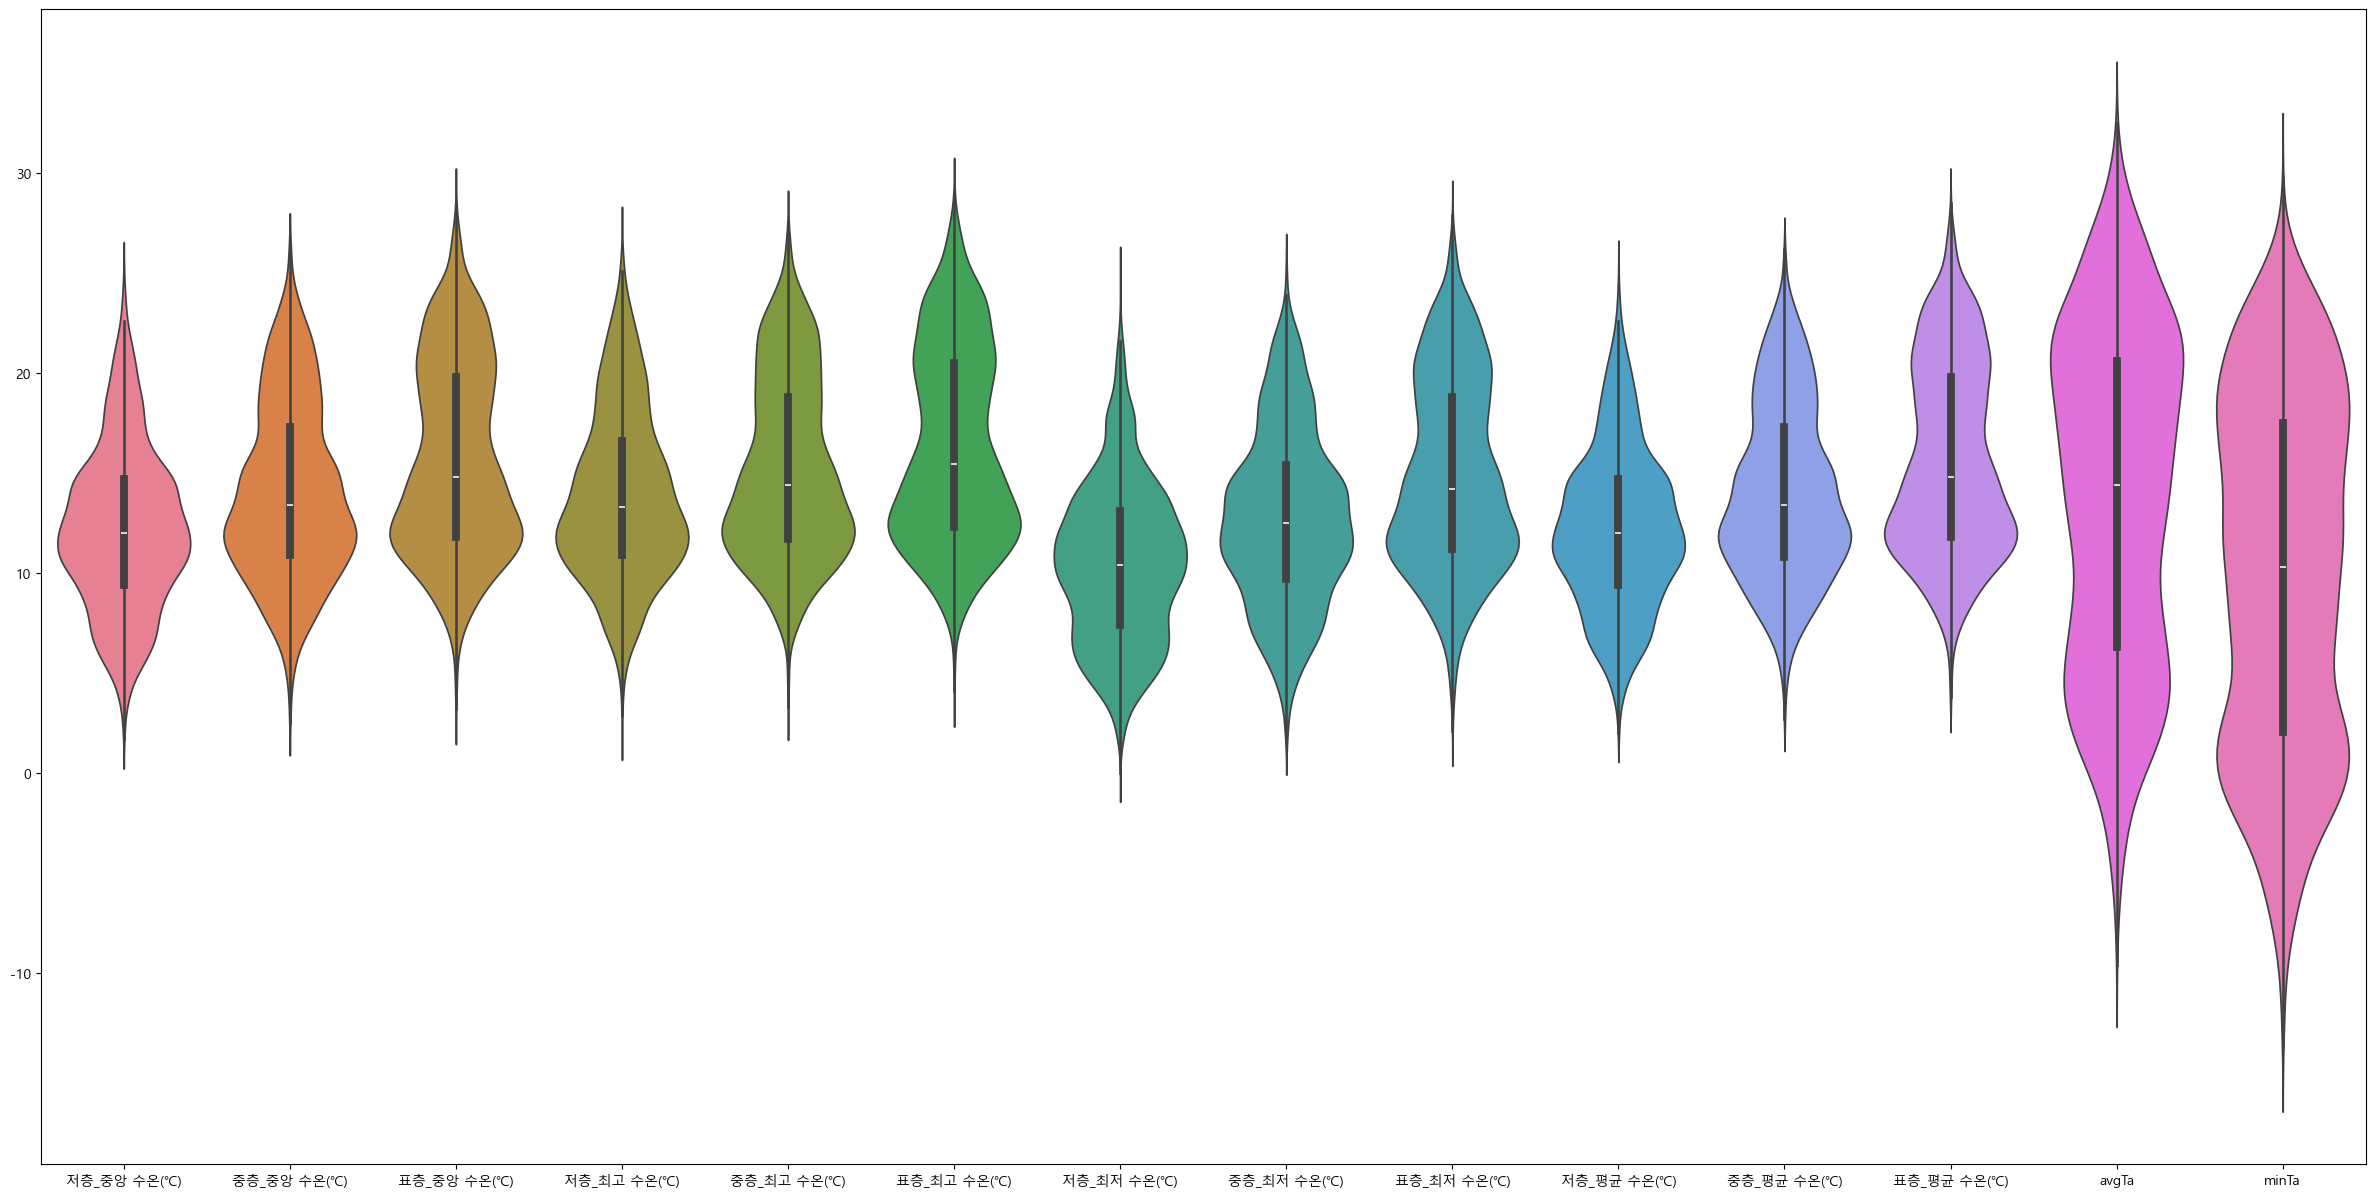

In [106]:
plt.figure(figsize=(30, 15))
sns.violinplot(data=test_1)
plt.show() # numeric_data[col_0] ...

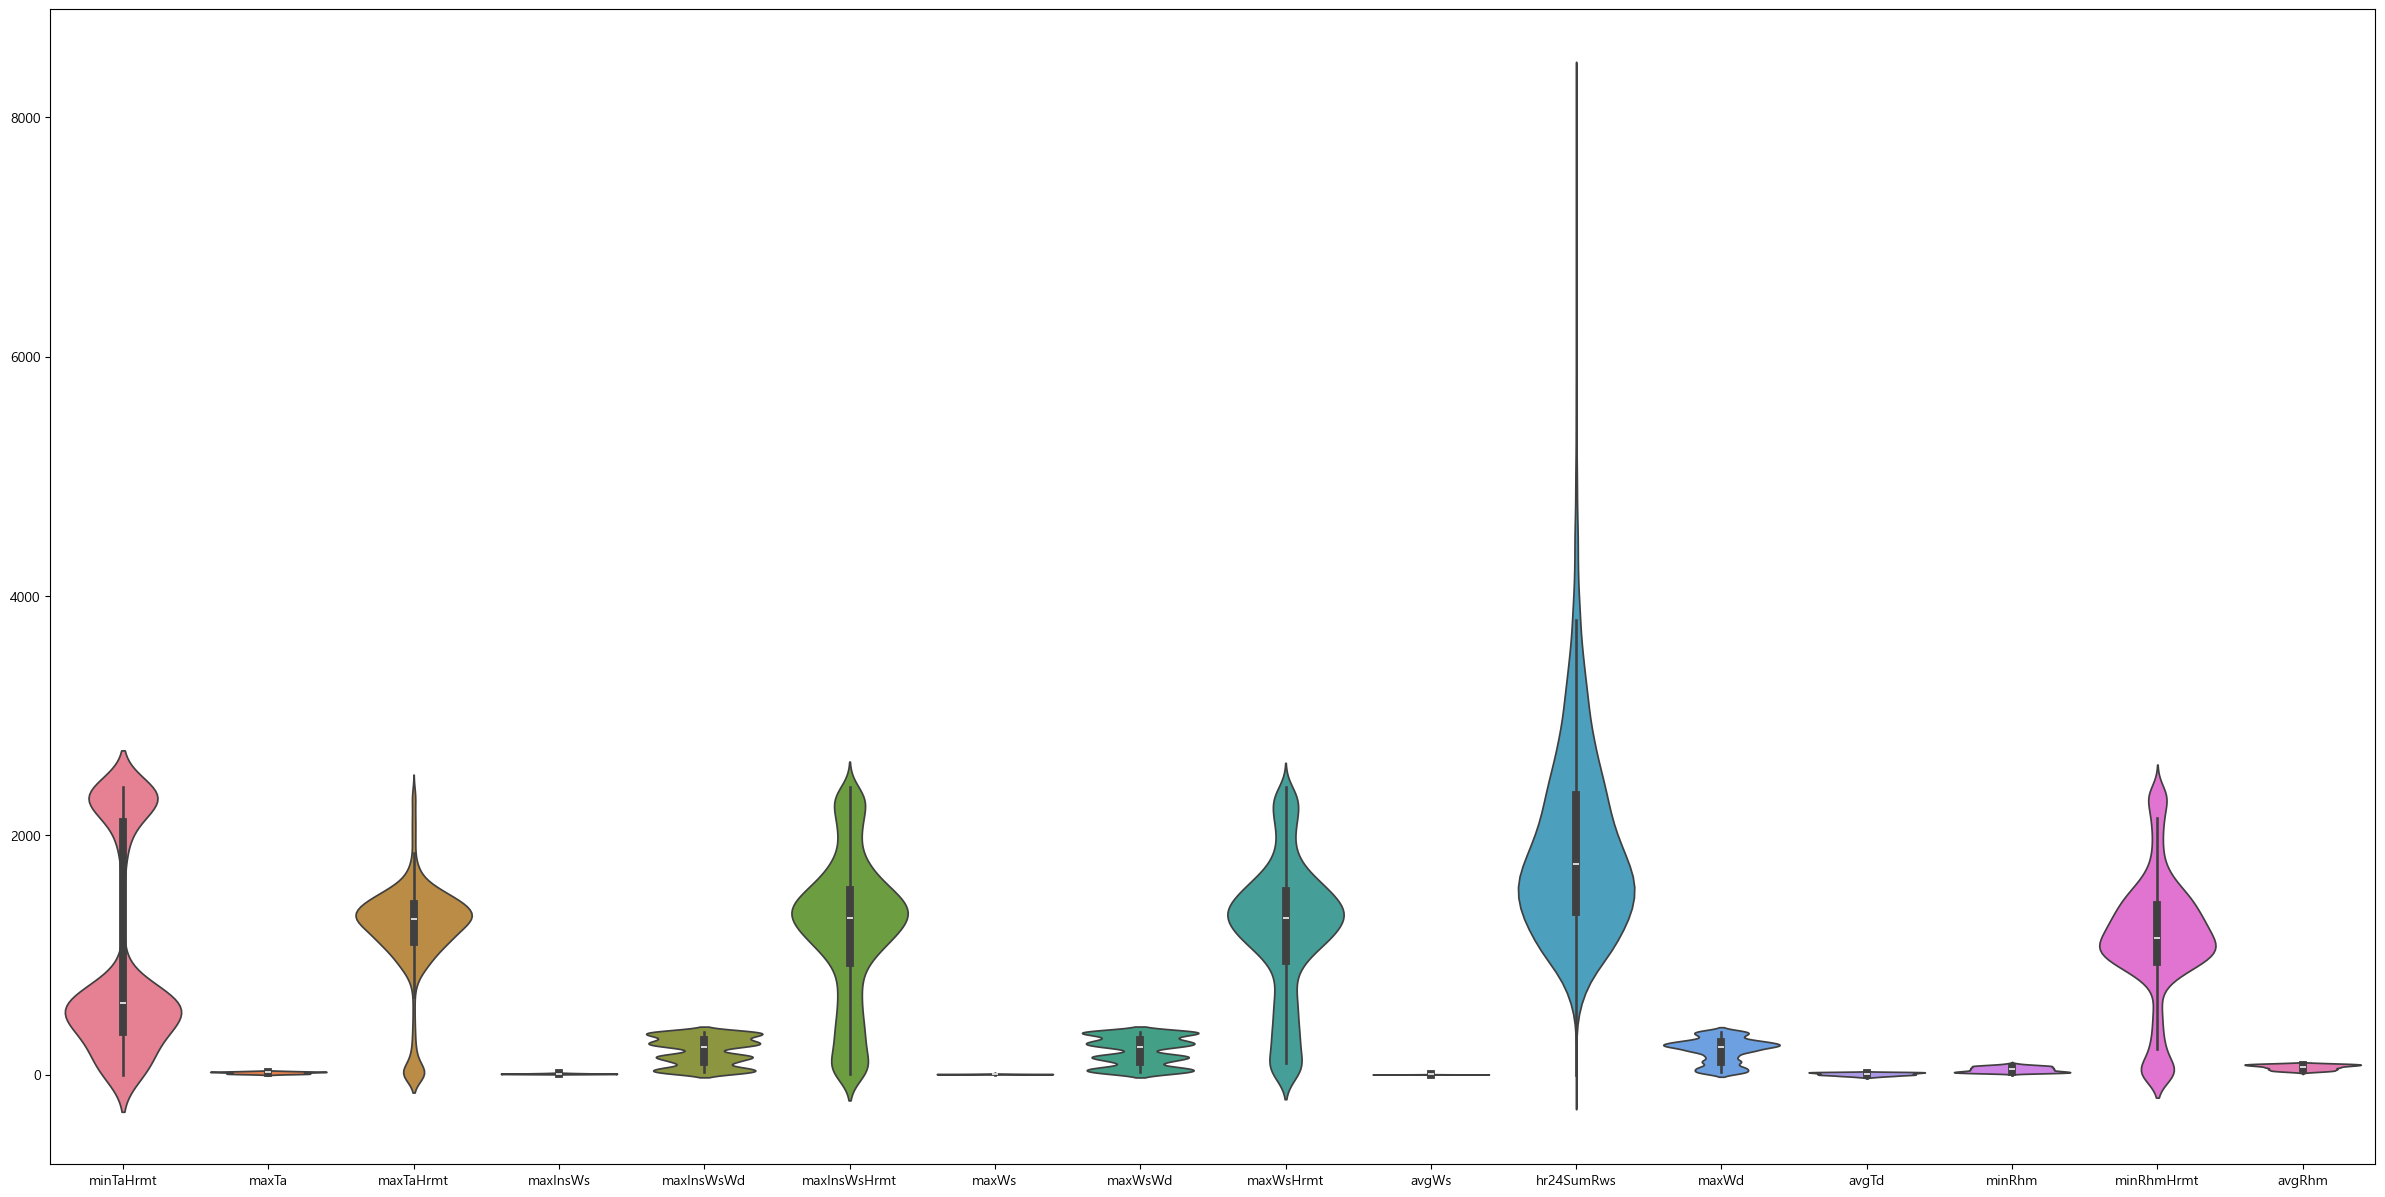

In [110]:
plt.figure(figsize=(30,15))
test_2=numeric_data[col_1]
sns.violinplot(data=test_2)
plt.show()

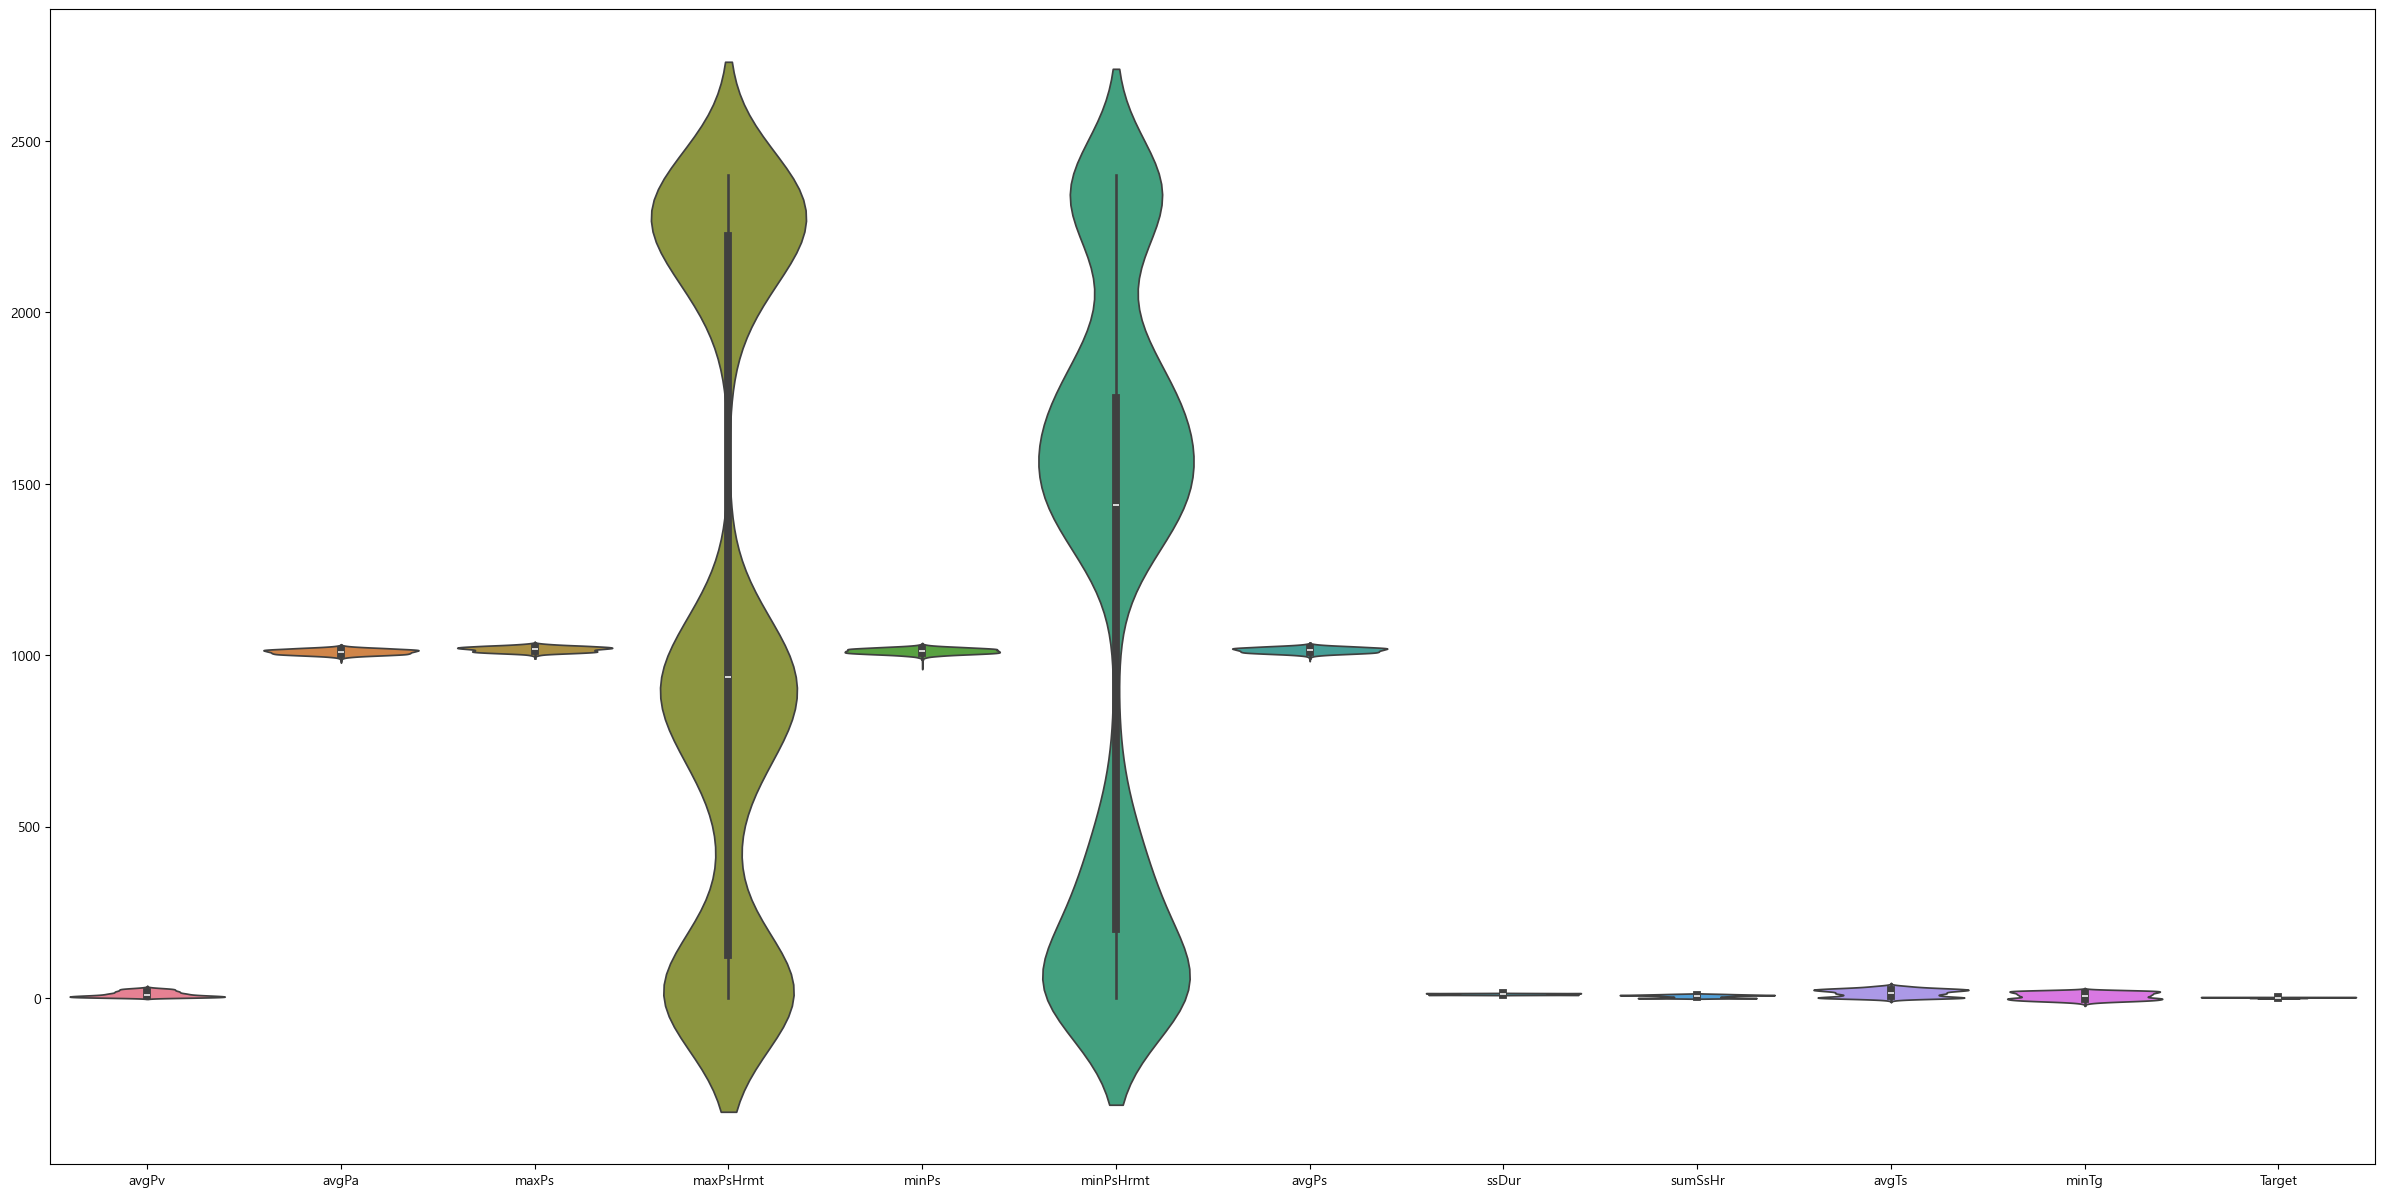

In [ ]:
plt.figure(figsize=(50,30))
test_3=numeric_data[col_2]
sns.violinplot(data=test_3)
plt.show()

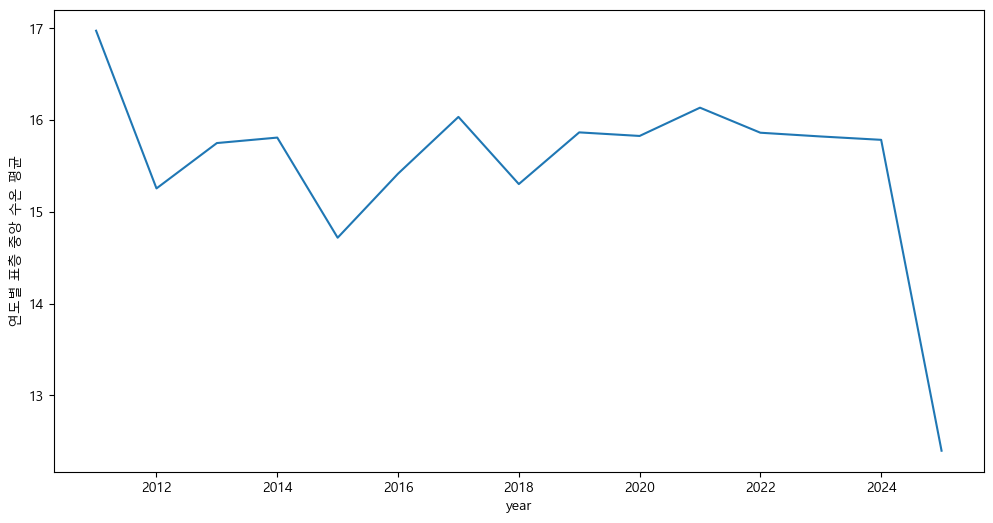

In [124]:
numeric_data.index=pd.to_datetime(numeric_data.index)
yearly_avg=numeric_data.groupby(numeric_data.index.year)['표층_중앙 수온(℃)'].mean()

plt.figure(figsize=(12,6))
sns.lineplot(x=yearly_avg.index,y=yearly_avg.values)
plt.xlabel("year")
plt.ylabel('연도별 표층 중앙 수온 평균')
plt.show()


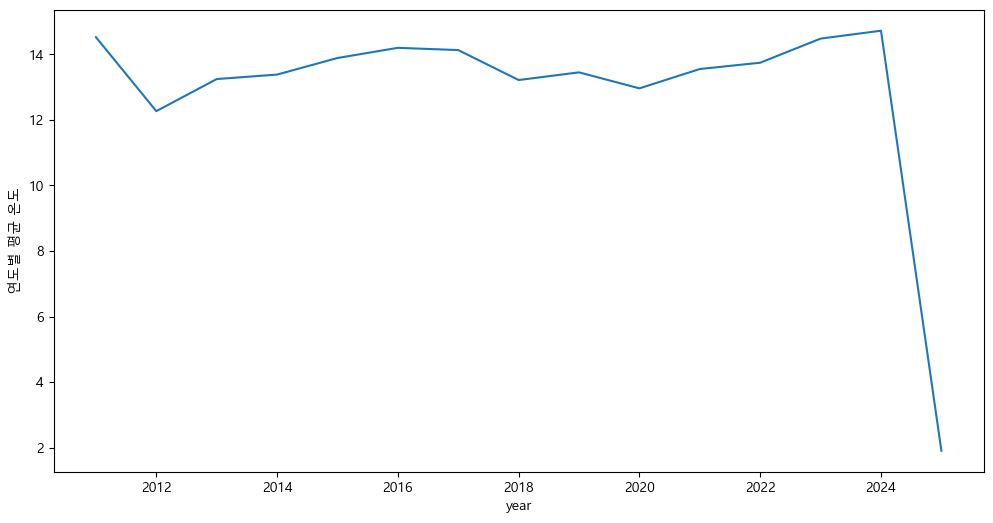

In [119]:
yearly_avg_tem=numeric_data.groupby(numeric_data.index.year)['avgTa'].mean()

plt.figure(figsize=(12,6))
sns.lineplot(x=yearly_avg_tem.index,y=yearly_avg_tem.values)
plt.xlabel("year")
plt.ylabel('연도별 평균 온도')
plt.show()

In [137]:
# 연도별 주차에 따른 평균 수온
df = pd.read_csv('data\Total_data_v2.csv')
df.columns


Index(['date', '관측소', '저층_중앙 수온(℃)', '중층_중앙 수온(℃)', '표층_중앙 수온(℃)',
       '저층_최고 수온(℃)', '중층_최고 수온(℃)', '표층_최고 수온(℃)', '저층_최저 수온(℃)',
       '중층_최저 수온(℃)', '표층_최저 수온(℃)', '저층_평균 수온(℃)', '중층_평균 수온(℃)',
       '표층_평균 수온(℃)', 'avgTa', 'minTa', 'minTaHrmt', 'maxTa', 'maxTaHrmt',
       'maxInsWs', 'maxInsWsWd', 'maxInsWsHrmt', 'maxWs', 'maxWsWd',
       'maxWsHrmt', 'avgWs', 'hr24SumRws', 'maxWd', 'avgTd', 'minRhm',
       'minRhmHrmt', 'avgRhm', 'avgPv', 'avgPa', 'maxPs', 'maxPsHrmt', 'minPs',
       'minPsHrmt', 'avgPs', 'ssDur', 'sumSsHr', 'avgTs', 'minTg'],
      dtype='object')

In [131]:
df_surface=df[['date','표층_평균 수온(℃)']]
df_surface['date'] = pd.to_datetime(df_surface['date'])

C:\Users\rnrgh\AppData\Local\Temp\ipykernel_22872\898807536.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_surface['date'] = pd.to_datetime(df_surface['date'])


In [132]:
df_surface['year'] = df_surface['date'].dt.year
df_surface['week'] = df_surface['date'].dt.isocalendar().week

C:\Users\rnrgh\AppData\Local\Temp\ipykernel_22872\2750398081.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_surface['year'] = df_surface['date'].dt.year
C:\Users\rnrgh\AppData\Local\Temp\ipykernel_22872\2750398081.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_surface['week'] = df_surface['date'].dt.isocalendar().week


In [134]:
weekly_avg = df_surface.groupby(['year', 'week'])['표층_평균 수온(℃)'].mean().reset_index()
pivot = weekly_avg.pivot(index='week', columns='year', values='표층_평균 수온(℃)')

In [135]:
print(pivot)

year       2011       2012       2013       2014       2015       2016  \
week                                                                     
1           NaN  13.500000  11.475000  12.737500  12.450000  13.800000   
2           NaN  13.071429  11.185714  12.314286  12.471429  13.428571   
3           NaN  12.314286  10.500000  11.042857  11.971429  12.685714   
4           NaN  11.528571  10.242857  10.528571  11.142857  11.642857   
5           NaN  10.428571   9.742857  10.414286  10.142857  11.128571   
6           NaN  10.100000   9.628571   9.714286  10.042857  10.442857   
7           NaN   9.642857   9.514286   8.400000   9.500000   9.528571   
8           NaN   9.142857  10.400000   8.671429   8.571429   9.914286   
9      8.833333   8.500000  10.214286   8.814286   8.714286  10.228571   
10     9.843750   8.328571  10.471429   8.971429   8.942857  10.057143   
11    10.412500   8.785714  10.000000  10.057143   8.700000  10.428571   
12    10.981250   9.971429  10.285714 

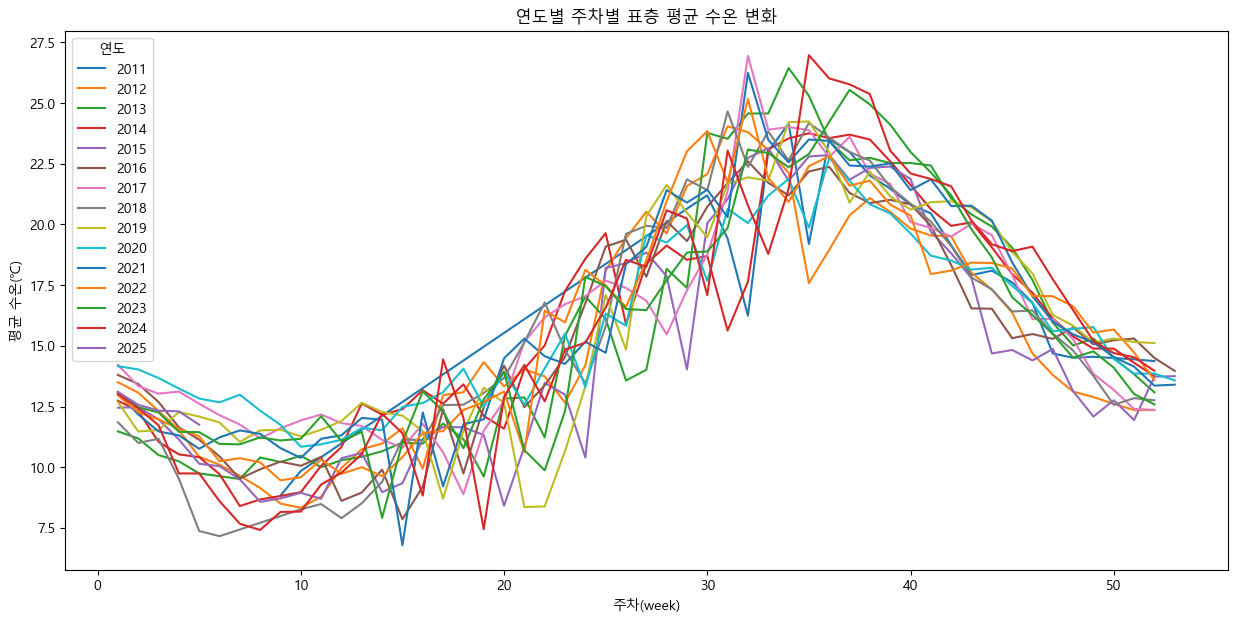

In [136]:
pivot.plot(figsize=(15, 7))
plt.title('연도별 주차별 표층 평균 수온 변화')
plt.xlabel('주차(week)')
plt.ylabel('평균 수온(℃)')
plt.legend(title='연도')
plt.show()